# Project 5, Ensamble Models

Author: Megan Chastain

Date: November 18th, 2025

Introduction: This project demonstrates the use of ensemble models in machine learning, specifically focusing on techniques such as bagging, boosting, and stacking. The goal is to improve predictive performance by combining multiple models.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

## Section 1. Load and Inspect the Data

In [ ]:
# Load the dataset (download from UCI and save in the same folder)
df = pd.read_csv("data/winequality-red.csv", sep=";")

# Display structure and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Section 2. Prepare the Data

In [ ]:
# Define helper function that:

# Takes one input, the quality (which we will temporarily name q while in the function)
# And returns a string of the quality label (low, medium, high)
# This function will be used to create the quality_label column
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"


# Call the apply() method on the quality column to create the new quality_label column
df["quality_label"] = df["quality"].apply(quality_to_label)


# Then, create a numeric column for modeling: 0 = low, 1 = medium, 2 = high
def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2


df["quality_numeric"] = df["quality"].apply(quality_to_number)

# Explain what we do and why as you proceed. 


Text(0, 0.5, 'Count')

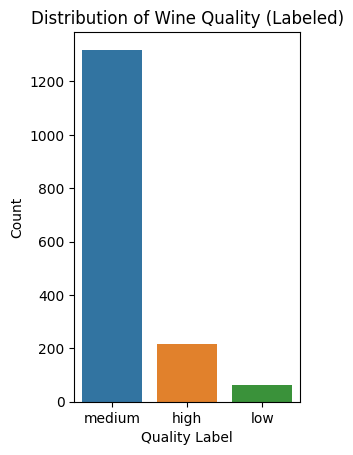

In [ ]:
plt.subplot(1, 2, 1)

sns.countplot(x="quality_label", data=df, hue="quality_label")
plt.title("Distribution of Wine Quality (Labeled)")
plt.xlabel("Quality Label")
plt.ylabel("Count")

## Section 3. Feature Selection and Justification

In [ ]:
# Define input features (X) and target (y)
# Features: all columns except 'quality' and 'quality_label' and 'quality_numberic' - drop these from the input array
# Target: quality_label (the new column we just created)
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])  # Features
y = df["quality_numeric"]  # Target
# Explain / introduce your choices.

## Section 4. Split the Data into Train and Test

In [ ]:
# Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Section 5.  Evaluate Model Performance (Choose 2)

Below is a list of  9 model variations. Choose two to focus on for your comparison. 

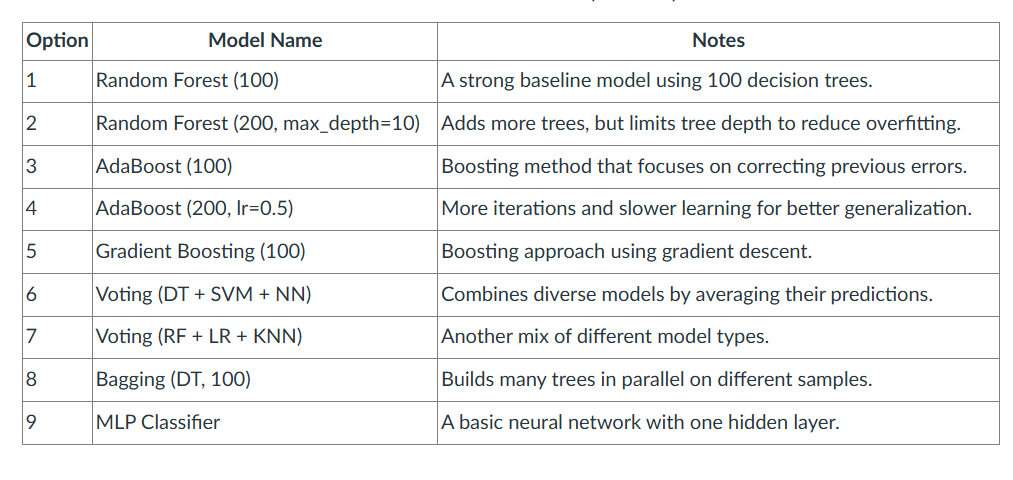


In [ ]:
# Helper function to train and evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Train F1": train_f1,
            "Test F1": test_f1,
        }
    )
results = []


Voting (DT + SVM + NN) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 247  17]
 [  0  18  25]]
Train Accuracy: 0.9289, Test Accuracy: 0.8500
Train F1 Score: 0.9124, Test F1 Score: 0.8310


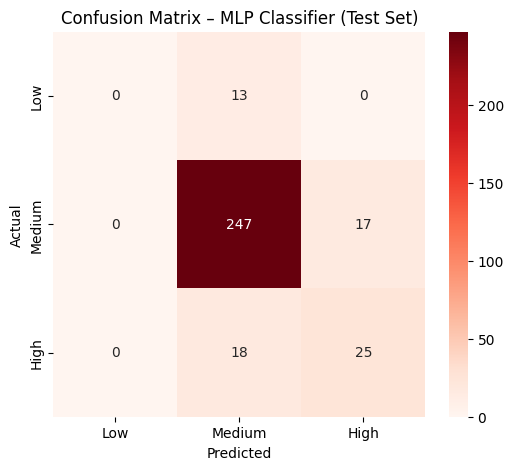

In [ ]:
# 6. Voting Classifier (DT, SVM, NN) 
voting1 = VotingClassifier(
    estimators=[
        ("DT", DecisionTreeClassifier()),
        ("SVM", SVC(probability=True)),
        ("NN", MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)),
    ],
    voting="soft",
)
evaluate_model(
    "Voting (DT + SVM + NN)", voting1, X_train, y_train, X_test, y_test, results
)

y_test_pred_voting1 = voting1.predict(X_test)
labels = ["Low", "Medium", "High"]
plt.figure(figsize=(6,5))
sns.heatmap(
    confusion_matrix(y_test, y_test_pred_voting1), 
    annot=True, 
    fmt="d", 
    cmap="Reds", 
    xticklabels=labels, 
    yticklabels=labels
)
plt.title("Confusion Matrix – MLP Classifier (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


MLP Classifier Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 257   7]
 [  0  30  13]]
Train Accuracy: 0.8514, Test Accuracy: 0.8438
Train F1 Score: 0.8141, Test F1 Score: 0.8073


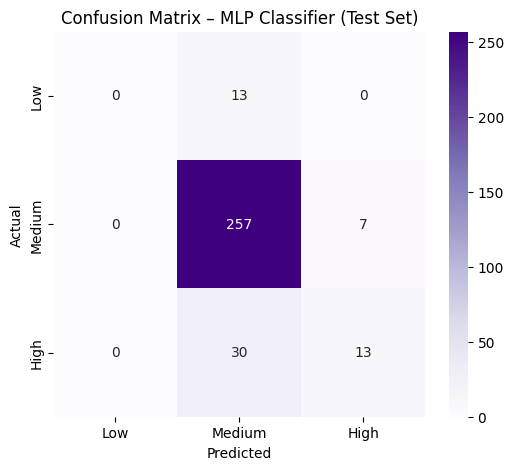

In [ ]:
# 9. MLP Classifier 
MLPC=MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
evaluate_model(
    "MLP Classifier",
    MLPC,
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)


y_test_pred_MLPC = MLPC.predict(X_test)
labels = ["Low", "Medium", "High"]
plt.figure(figsize=(6,5))
sns.heatmap(
    confusion_matrix(y_test, y_test_pred_MLPC), # Use the correct prediction variable
    annot=True, 
    fmt="d", 
    cmap="Purples", # Corrected 'Purlples' typo to 'Purples'
    xticklabels=labels, 
    yticklabels=labels
)
plt.title("Confusion Matrix – MLP Classifier (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Section 6. Compare Results 

In [ ]:
# Create a table of results 
results_df = pd.DataFrame(results)

print("\nSummary of All Models:")
display(results_df)


Summary of All Models:


,Model,Train Accuracy,Test Accuracy,Train F1,Test F1
0,Voting (DT + SVM + NN),0.916341,0.85625,0.897973,0.831882
1,MLP Classifier,0.851446,0.84375,0.814145,0.807318


## Section 7. Conclusions and Insights

Comparting the results of the tests I chose, MLP Classifier best fits the data while the accuracy and F1 scores stay high. There's too much of a difference betweent the train and test results of both accuracy and F1 in the Voting(DT+SVM+NN) model.

 Looking at the available projects posted by me peers, the ADA(100) has similar results to the MLP classifier model in so far as the small gap between train and test scores as well as how high the accuracy and F1 results show.
https://github.com/ssowers2/applied-ml-sowers/blob/main/notebooks/project05/ensemble-sowers.ipynb

 Either the ADA (100) or the MLP classifier would be better than using Random Forest or Gradient Boosting
https://github.com/anjana-codes/applied-ml-anjana/blob/main/notebooks/project05/ensemble-anjana.ipynb